<a href="https://colab.research.google.com/github/Shahnawaz2506/IndianFashion/blob/main/Fashion_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from google.colab import drive
from tensorflow.keras.preprocessing import image
import numpy as np
# This will prompt you to click on a link, sign in to your Google account, and get an authorization code.
drive.mount('/content/drive')
import tensorflow as tf

# try:
#     tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
#     tf.config.experimental_connect_to_cluster(tpu)
#     tf.tpu.experimental.initialize_tpu_system(tpu)
#     strategy = tf.distribute.TPUStrategy(tpu)
# except Exception as e:
#     print(e)
#     strategy = tf.distribute.get_strategy()
gpu_devices = tf.config.list_physical_devices('GPU')
if gpu_devices:
    for gpu in gpu_devices:
        print("Device name:", gpu.name)
        print("Device type:", gpu.device_type)
else:
    print("No GPU available.")


Mounted at /content/drive
Device name: /physical_device:GPU:0
Device type: GPU


In [ ]:

# Define paths to your dataset
train_data_dir = '/content/drive/MyDrive/Colab Notebooks/Nykaa/training'
validation_data_dir = '/content/drive/MyDrive/Colab Notebooks/Nykaa/validation'

# Number of classes in your dataset
num_classes = 6  # Update based on your dataset's number of classes

# Image size for ResNet50 (must be at least 197x197)
img_width, img_height = 250, 300

# Load ResNet50 pre-trained on ImageNet and exclude the top classification layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers for classification
# with strategy.scope():

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 10, 2048)       23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 24113798 (91.99 MB)
Trainable params: 526086 (2.01 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


Found 902 images belonging to 6 classes.
Found 581 images belonging to 6 classes.
{'kurtis-kurtas-and-tunics': 53, 'lehengas': 119, 'palazzos': 105, 'salwar-suits-and-sets': 295, 'sarees': 202, 'top-and-tunics': 128}
[0. 0. 0. 0. 1. 0.]


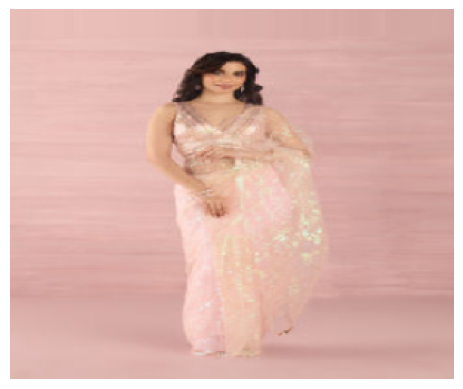

In [ ]:

# Data augmentation and generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    # shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)
class_counts = train_generator.classes  # This will give you an array of class indices

# Convert the class indices to a dictionary with class names and their counts
class_indices = train_generator.class_indices  # Dictionary mapping class names to class indices
class_counts_dict = {class_name: sum(class_counts == class_idx) for class_name, class_idx in class_indices.items()}
print(class_counts_dict)

import matplotlib.pyplot as plt
images, labels = train_generator.next()
print(labels[0])
# Display one image from the batch
plt.imshow(images[0])
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:


# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,  # Adjust epochs as needed
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)


Epoch 1/10
10/29 [=========>....................] - ETA: 3:00 - loss: 1.9893 - accuracy: 0.1735

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


29/29 [==============================] - 556s 19s/step - loss: 1.9008 - accuracy: 0.2561 - val_loss: 1.7484 - val_accuracy: 0.2909
Epoch 2/10
29/29 [==============================] - ETA: 0s - loss: 1.7167 - accuracy: 0.2960

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


29/29 [==============================] - 25s 877ms/step - loss: 1.7167 - accuracy: 0.2960 - val_loss: 1.8307 - val_accuracy: 0.2806
Epoch 3/10
21/29 [====================>.........] - ETA: 5s - loss: 1.7208 - accuracy: 0.3189

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


29/29 [==============================] - 24s 833ms/step - loss: 1.7075 - accuracy: 0.3204 - val_loss: 1.7176 - val_accuracy: 0.2427
Epoch 4/10
16/29 [===============>..............] - ETA: 9s - loss: 1.6730 - accuracy: 0.3313

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


29/29 [==============================] - 26s 894ms/step - loss: 1.6655 - accuracy: 0.3282 - val_loss: 1.8121 - val_accuracy: 0.1497
Epoch 5/10
22/29 [=====================>........] - ETA: 5s - loss: 1.6748 - accuracy: 0.2955

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


29/29 [==============================] - 26s 902ms/step - loss: 1.6848 - accuracy: 0.2993 - val_loss: 1.7785 - val_accuracy: 0.2806
Epoch 6/10
18/29 [=================>............] - ETA: 7s - loss: 1.6727 - accuracy: 0.3109

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


29/29 [==============================] - 25s 873ms/step - loss: 1.6519 - accuracy: 0.3060 - val_loss: 1.7096 - val_accuracy: 0.2857
Epoch 7/10
 1/29 [>.............................] - ETA: 29s - loss: 1.5651 - accuracy: 0.3438

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


29/29 [==============================] - 27s 921ms/step - loss: 1.6202 - accuracy: 0.3182 - val_loss: 1.7240 - val_accuracy: 0.2806
Epoch 8/10
14/29 [=============>................] - ETA: 10s - loss: 1.6349 - accuracy: 0.3705

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


29/29 [==============================] - 24s 835ms/step - loss: 1.6668 - accuracy: 0.3359 - val_loss: 1.7067 - val_accuracy: 0.2806
Epoch 9/10
28/29 [===========================>..] - ETA: 0s - loss: 1.6679 - accuracy: 0.2943

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


29/29 [==============================] - 28s 952ms/step - loss: 1.6667 - accuracy: 0.2938 - val_loss: 1.6219 - val_accuracy: 0.3064
Epoch 10/10
13/29 [============>.................] - ETA: 11s - loss: 1.6124 - accuracy: 0.3615

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


29/29 [==============================] - 25s 867ms/step - loss: 1.6252 - accuracy: 0.3359 - val_loss: 1.6716 - val_accuracy: 0.2926
